# Análisis de actividad sísmica en México

![Alerta](im.png)

Para los que tengan curiosidad de ver cómo se sacó la información de la página del SSN, hay otro .ipynb en este folder donde se explica detalladamente. Lo primero que hay que hacer es cargar los paquetes necesarios. Esto significa importar (e instalar anteriormente) los siguientes paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from helpers.Mexico import Republica

republica = Republica()

sns.set_style("darkgrid")

El paquete de seaborn lo pueden instalar con pip3, al igual que folium. helpers.Mexico es un paquete que yo hice para ayudarles un poco, de ahí saco la clase `Republica`.

De los paquetes necesarios, `Folium` es por mucho el más complejo. Permite hacer mapas interactivos en jupyter. Yo me he dado a la tarea de bajar del inegi las divisiones políticas del país y pasarlas a un formato que `Folium` entiende, conocido como topojson. El archivo se encuentra en el folder `helpers`. No es necesario que entiendan su contenido, pero yo les explicaré más adelante su uso.

Carguemos rápidamente el csv de la actividad sísmica reportada por el SSN de la UNAM desde el 1 de Enero de 1990 hasta el 17 de Febrero del 2018. Además de cargar el csv, vamos a ver los primeros 5 renglones, para familiarizarnos con el formato:

In [2]:
#Definimos una lambda que convierta una cadena de caracteres en una etiqueta de tiempo.
mConverters = {'Fecha y Hora': lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') }
#Usamos la lambda para cargar el csv. Los nombres de las columnas son el primer renglón
sismos = pd.read_csv('helpers/earthquakes.csv', index_col = 0, converters = mConverters)
#Mostremos los primeros 5 renglones con la función head
sismos.head() # En el par'entesis podemos poner el numero de reglones a mostrar. Por default es 5. 

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44


El csv es muy, muy sencillo. Contiene sólo 5 columnas: Magnitud, Latitud, Longitud, Profundidad y Fecha-Hora. Las primeras tres columnas son flotantes, mientras la quinta es una estampa de tiempo. Tendrán que aprender a usar estampas de tiempo pero yo les puedo ayudar.

## Ejercicio 1: Magnitud de los sismos

Calculen las siguientes cantidades (explicando en su código cómo lo hacen):
1. Cuenta total de sismos
2. Rango de magnitud de los sismos
3. Número de sismos por cada categoría, siendo las categorías {[1,2), [2,3),[3,4),[4,5),[5,6),[6,7),[7,8),[8,9)}
4. Número de sismos en cada año, graficado como un histograma (¿Ha aumentado la actividad sísmica?)

### 1. Cuenta total de sismos

In [3]:
# Podemos saber el número de sismos si conocemos el número de renglones de la lista:
cuenta_total_de_sismos=len(sismos)
print ("total de sismos:" , cuenta_total_de_sismos)


total de sismos: 105946


### 2. Rango de magnitud de los sismos

In [4]:
# Podemos ordenar los sismos adecuerdo con su magnitud:

sismos_ordenados=sismos.sort_values(by='Magnitud')
sismos_ordenados.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora
12215,1.2,19.31,-99.170,4,2017-10-17 02:00:26
57458,1.2,19.03,-98.621,4,2014-11-27 02:14:16
9622,1.3,19.35,-99.150,7,2017-11-09 04:11:33
20433,1.3,19.53,-99.160,2,2017-08-24 12:56:19
16549,1.3,19.24,-99.220,3,2017-09-20 04:32:54


In [5]:
# De este modo el primer elemento de la lista correspondera al sismo de menor magnitud:

print(sismos_ordenados.iloc[1][0])

1.2


In [6]:
# Y el ultimo elemento sera el de mayor magnitud:

print(sismos_ordenados.iloc[105945][0])

8.2


### Otra forma

In [7]:
#Con el siguiente código podemos obtener los valores mayores de cada columna. Si cambiamos max() por min()
#obtendremos los valores menores:

sismos_ordenados.max()

Magnitud                            8.2
Latitud                         33.4665
Longitud                       -85.5467
Profundidad (km)                    394
Fecha y Hora        2018-02-17 23:57:31
dtype: object

In [8]:
sismo_mayor = sismos['Magnitud'].max()

In [9]:
sismo_menor = sismos['Magnitud'].min()

In [10]:
print ("El rango de los sismos que ha habido va desde los",sismo_menor, "a los" ,sismo_mayor, "grados" )

El rango de los sismos que ha habido va desde los 1.2 a los 8.2 grados


### 3. Número de sismos por cada categoría, siendo las categorías {[1,2), [2,3),[3,4),[4,5),[5,6),[6,7),[7,8),[8,9)}

In [11]:
# Con el siguiente código podemos obtener el número de sismos entre 1 y 2 grados: 

contador_1=0 #Contador del numero de sismos
for i in range(105945):
    #De la columna "Magnitud" seleccionamos aquellos que estan entre 1 y 2 grados.
    #Inclusive = False indica que el intervalo es abierto en 2 (no incluye a 2). 
        if (sismos['Magnitud'].between(1, 2, inclusive=False)[i]==True):
            contador_1=contador_1+1 # Actualizamos el valor del contador
print(contador_1)

54


Con lo anterior acabamos de obtener el número de sismos en la categoria de [1,2). Mientras cambiemos los valores que se encuentran en la instrucción between() podemos  obtener el resto de los rangos. 

In [12]:
cantidad_de_sismos_por_rango = [] # Creamos una lista que contendra el numero de sismos para cada rango. 
for i in range(8): # El rango es 8 porque tenemos  categorias. 
    i=i+1 # Por default el contador inicia en cero. Sumamos una unidad para iniciar en 1
    contador=0 #Contador del numero de sismos. Cada vez que termine el ciclo de abajo el contador tendra un nuevo valor.
    for j in range(105945):
            #en between() ponemos i e i+1 para marcar los intervalos y que estos cambien con cada ciclo. 
            if (sismos['Magnitud'].between(i, i+1, inclusive=False)[j]==True):
                contador=contador+1 # Actualizamos el valor del contador
    print(contador)
    cantidad_de_sismos_por_rango.append(contador)# Agregamos el número de sismos a la lista
    
    # Este código tarda 8:40 min aprox. en terminar de ejecutarse. 

54
1935
77835
15655
635
75
13
1


In [13]:
# Con lo anterior hemos obtenido la lista del número de sismos en  los rangos especificados. 

cantidad_de_sismos_por_rango

[54, 1935, 77835, 15655, 635, 75, 13, 1]

Hacemos un dataframe con los rangos y el número de sismos en cada uno. 

In [14]:
# Con esto sustituiremos el indice que viene por default por los rangos.

etiquetas_rangos = ["[1,2)","[2,3)","[3,4)","[4,5)","[5,6)","[6,7)","[7,8)","[8,9)"]

In [15]:
columna=["Número de sismos por rango"]

In [16]:
df = pd.DataFrame(cantidad_de_sismos_por_rango,index = etiquetas_rangos, columns=columna)
df

,Número de sismos por rango
"[1,2)",54
"[2,3)",1935
"[3,4)",77835
"[4,5)",15655
"[5,6)",635
"[6,7)",75
"[7,8)",13
"[8,9)",1


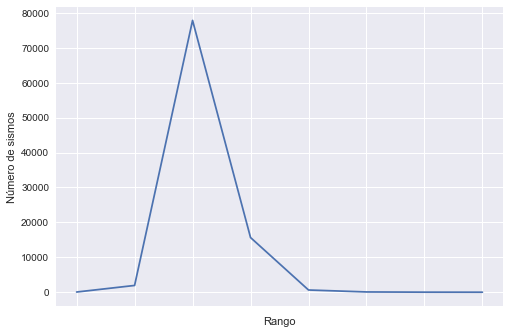

In [17]:
# Create graph

plt.xlabel("Rango") #Etiqueta para el eje X
plt.ylabel("Número de sismos")#Etiqueta para el eje Y
 

df["Número de sismos por rango"].plot() #.hist()
plt.show()

### 4. Número de sismos en cada año, graficado como un histograma (¿Ha aumentado la actividad sísmica?)

In [18]:
#df['year'] = df['ArrivalDate'].dt.year #https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python

# Ordenamos el número de año. Obtenemos una lista con los año que aparecen en el dataframe sismos. 

sismos["anuales"]=sismos["Fecha y Hora"].dt.year #sismos["Fecha y Hora"].dt.year[2]
sismos["anuales"].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: anuales, dtype: int64

In [19]:
# Contamos el número de sismos por año. 
# Para esto contamos el número de veces que un mismo año se repite en la lista anterior.

sismos_anuales = sismos["anuales"].value_counts() 
sismos_anuales # Esto es una serie. 

2017    26123
2016    15281
2015    10944
2014     7606
2013     5360
2012     5243
2018     4308
2011     4272
2010     3462
2009     2302
2008     1955
2002     1688
2007     1528
2006     1355
2004     1346
2001     1335
2003     1323
2005     1210
1999     1098
2000     1043
1998     1022
1997     1006
1993      915
1990      795
1996      789
1991      724
1995      678
1994      622
1992      613
Name: anuales, dtype: int64

In [20]:
# Convertimos la serie anterior en un dataframe:

SismosAnuales=pd.DataFrame({'Año':sismos_anuales.index, 'Sismos':sismos_anuales.values})
SismosAnuales

,Año,Sismos
0,2017,26123
1,2016,15281
2,2015,10944
3,2014,7606
4,2013,5360
5,2012,5243
6,2018,4308
7,2011,4272
8,2010,3462
9,2009,2302


In [21]:
# Ordenamos el dataframe anterior de cuerdo al año.

sismos_anuales_ordenados=SismosAnuales.sort_values(by=['Año'])
#min(SismosAnuales['Año'])

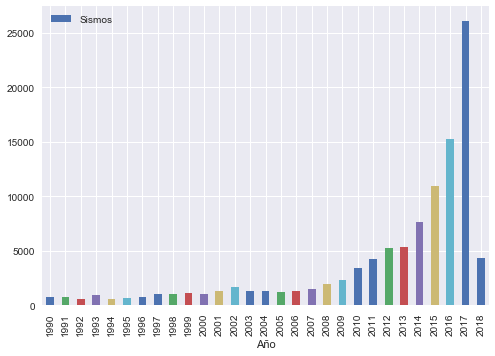

In [22]:
# Con el dataframe es hacemos un histograma.

sismos_anuales_ordenados.plot( x='Año', y='Sismos',kind="bar")
#plt.xticks(np.arange(min(sa['Año']), max(sa['Año'])+1, 1),rotation=90)
plt.show()

## Ejercicio 2: Graficando en el mapa

Para lo que viene, ustedes deben añadir una columna de nombre "Estado" al DataFrame `sismos`. Para ello, la variable `republica` declarada al principio del documento tiene una función llamada `estadoSegunPunto` que recibe como parámetros un par de números (latitud y longitud) y dice en qué estado de la república ocurrió el sismo (por ejemplo `republica.estadoSegunPunto(19,-100)`. La función devuelve `np.nan` si el punto no se encuentra dentro de un estado. Como ejercicio:

1. Calculen el porcentaje de epicentros dentro del territorio mexicano (en este caso el mar no cuenta).
2. Calculen cuántos sismos ocurrieron por estado.
3. Determinen cual es el estado con menor actividad sísmica (en cuanto a epicentros) y cuál el de mayor
4. Hagan un mapa de colores de la actividad sísmica por estado. Agarren buenos colores y usen una buena escala.

Para el cuarto punto, utilicen `Folium`. Les dejo el tip: las funciones que necesitan son `folium.Map()` (que genera un objeto, llamémoslo `mexmap`) y la función `.choropleth` (miembro de `mexmap`). Hay ejemplos en internet de esto, pero si tienen dudas y están muy muy frustrados, mándenme un correo y les ayudo un poco. Para generar el _choropleth_, necesitan el archivo `helpers/mexican_states.geojson`, la función `choropleth` se los va a pedir pero no tienen que entender lo que hay dentro. Ah, eso sí, los nombres de los estados están etiquetados por el nombre "NOM_ENT" (`choropleth` se los va a pedir...).

### 0.- Añadir una columna de nombre "Estado"

In [23]:
# Asi es como esta el dataframe original:
sismos.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,anuales
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31,2018
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51,2018
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03,2018
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22,2018
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44,2018


De este modo forma podemos obtener un dato especifico de una columna:

In [24]:
sismos["Latitud"][0]

15.83

In [25]:
sismos["Longitud"][0]

-98.409999999999997

Por otro lado, la función republica.estadoSegunPunto requiere de dos coordenadas y devuelve un string con el nombre del estado correspondiente y Nan si se encuentra fuera de territorio mexicano (el mar)

In [26]:
republica.estadoSegunPunto(19,-100)

'México'

In [27]:
republica.estadoSegunPunto(15.83,-98.41)

nan

Por la anterior, podemos darle a la función los datos de longitud y latitud de las columnas del dataframe: 

In [28]:
republica.estadoSegunPunto(sismos["Latitud"][1],sismos["Longitud"][1])

'Oaxaca'

In [29]:
# Creamos una lista con los resultados de la  la funcion republica.estadoSegunPunto luego de ingresar cada 
#una de las coordenadas del dataframe.

estados = [] # Lista donde colocaremos lo que nos devuelva la función. 
for i in range(cuenta_total_de_sismos):
    a=republica.estadoSegunPunto(sismos["Latitud"][i],sismos["Longitud"][i])
    estados.append(a) # Agregamos el resultado a la lista. 
    

In [30]:
# Con la siguiente linea añadimos la columna de los estados apartir de la lista obtenida en el paso anterior. 

sismos["Estado"] = pd.Series(estados).values 

In [31]:
#Asi es como se ve ahora el dataframe "sismos" 
sismos.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,anuales,Estado
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31,2018,NaN
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51,2018,Oaxaca
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03,2018,Oaxaca
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22,2018,Oaxaca
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44,2018,NaN


### 1. Calculen el porcentaje de epicentros dentro del territorio mexicano (en este caso el mar no cuenta).

Vemos en el dataframe anterior que en la columna 'Estado' tenemos dos tipos de datos: float y str (flotantes y strings)

In [32]:
type(sismos["Estado"][0])

float

In [33]:
type(sismos["Estado"][1])

str

In [34]:
sismos_en_el_territorio = 0 # Contador de sismos en el territorio
contador_mar = 0 # Contador de sismos es el mar (Nan's)

for i in range(cuenta_total_de_sismos):
    # Contamos los datos que son de tipo str
    if(type(sismos["Estado"][i])==type("hola")):
        
        sismos_en_el_territorio = sismos_en_el_territorio + 1
    
    else:# Contamos datos los que son de tipo float
        contador_mar = contador_mar+1
        
# Imprimimos el número de sismos dentro del territorio
print("Cantidad de sismos en el territorio:",sismos_en_el_territorio)

#print(contador_mar)


Cantidad de sismos en el territorio: 46585


In [35]:
# Calculamos el pocentaje apartir del resultado anterior y del total de sismos.

porcentaje_de_sismos_en_el_territorio = ((sismos_en_el_territorio)*100)/cuenta_total_de_sismos


print("Porcentaje de sismos en el territorio:",porcentaje_de_sismos_en_el_territorio)

Porcentaje de sismos en el territorio: 43.97051328035037


### 2. Calculen cuántos sismos ocurrieron por estado.

Con la siguiente linea podemos obtener el número de veces que el nombre de un estado se repite en el dataframe, el cual correspondera a la cantidad de sismos en ese estado.

In [36]:
se=sismos['Estado'].value_counts()
se

Oaxaca                             23615
Guerrero                           11732
Chiapas                             3387
Veracruz de Ignacio de la Llave     2415
Michoacán de Ocampo                 1628
Jalisco                             1269
Puebla                               556
Nuevo León                           355
Chihuahua                            340
Hidalgo                              329
México                               285
Distrito Federal                     115
Morelos                               97
Tabasco                               81
San Luis Potosí                       65
Tamaulipas                            64
Durango                               62
Sinaloa                               37
Aguascalientes                        33
Coahuila de Zaragoza                  30
Guanajuato                            27
Zacatecas                             25
Tlaxcala                              19
Querétaro                             17
Campeche        

### 3. Determinen cual es el estado con menor actividad sísmica (en cuanto a epicentros) y cuál el de mayor

Con la tabla anterior es posible ver que en Oaxaca se presenta la mayor actividad sismica, mientras que la menor se encuentra en Campeche. A continuación hago convivertimos la serie anterior en un dataframe.  

In [37]:
type(se.value_counts())

pandas.core.series.Series

In [38]:
sismos['Estado'].value_counts().to_frame()

,Estado
Oaxaca,23615
Guerrero,11732
Chiapas,3387
Veracruz de Ignacio de la Llave,2415
Michoacán de Ocampo,1628
Jalisco,1269
Puebla,556
Nuevo León,355
Chihuahua,340
Hidalgo,329


In [39]:
# Ordenamos los nombres de las columnas. 

sismos_por_estado=pd.DataFrame({'Estado':se.index, 'Cantidad de sismos':se.values})
#https://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe

In [40]:
sismos_por_estado

,Cantidad de sismos,Estado
0,23615,Oaxaca
1,11732,Guerrero
2,3387,Chiapas
3,2415,Veracruz de Ignacio de la Llave
4,1628,Michoacán de Ocampo
5,1269,Jalisco
6,556,Puebla
7,355,Nuevo León
8,340,Chihuahua
9,329,Hidalgo


In [41]:
sismos_por_estado.iloc[0][1]

'Oaxaca'

### 4. Hagan un mapa de colores de la actividad sísmica por estado. Agarren buenos colores y usen una buena escala.

In [42]:
# Con la siguiente linea obtenemos un mapa donde se visualiza el territorio mexicano.
# Para ello se utilizan las coordenadas de latitud y longitud, ademas de un zoom inicial. 

m = folium.Map(location=[23.0000000,-102.0000000],zoom_start=4)
#m = folium.Map(location=[sismos["Latitud"][1],sismos["Longitud"][2]])

In [43]:
m

In [44]:
# Esto es para obtener un archivo .json y uno csv apartir del dataframe 'sismos_por_estado' 
#sismos_por_estado.to_json('sismos_por_estado.json')

#sismos_por_estado = sismos['Estado'].value_counts().to_frame().reset_index()

#sismos_por_estado.columns = ['Estado','Cantidad de sismos']

#sismos_por_estado  

#sismos_por_estado.to_csv("sismos.csv")

#folium.__version__

In [45]:
#A continuación hacemos el choropleth

#http://folium.readthedocs.io/en/latest/quickstart.html
#https://github.com/ocefpaf/folium_notebooks/blob/master/test_choropleth.ipynb
#https://github.com/python-visualization/folium/issues/220
#http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/ocefpaf/103d19edd67cb9dad562008f97a556af/raw/ba03e2ade2466624ab6eb1d851d8edd1a9055d34/chropleth.ipynb
#https://matplotlib.org/examples/color/colormaps_reference.html

mex_geo = r'./helpers/mexican_states.geojson' # Abrimos el archivo .geojson que tiene las divisiones politicas. 
mapa = folium.Map(location=[23.0,-102.0],zoom_start=5)

# Paletas de colores que pueden usarse con folium.Map():

#'PuRd', 'YlOrBr','BuPu'
#color_de_escala = 'YlGn' #Verde
#color_de_escala = 'YlOrRd' #Roja

# 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu',
# 'YlGn', 'YlGnBu', 'YlOrBr',  'YlOrRd'
#https://github.com/python-visualization/folium/blob/master/folium/folium.py

color_de_escala = 'YlOrRd' # Elegimos una escala de colores. 

mapa.choropleth(geo_data = mex_geo, # Llamamos al geojson anterior. 
              data = sismos_por_estado, # Indicamos la lista de datos a usar. 
              columns = ['Estado','Cantidad de sismos'], # Indicamos las columnas a usar. 
              key_on='feature.properties.NOM_ENT', # De aqui identificara los nombres de los estados con la region en el mapa. 
              fill_color = color_de_escala, # De color de relleno (dependiendo del estado).
              fill_opacity = 0.7, # Transparencia del color de relleno. 
              line_opacity = 0.7, # Intensidad de la linea de division territorial. 
              legend_name = 'Cantidad de sismos') # Nombre (título) de la escala. 


mapa

In [46]:
#gist.github.com/ponentesincausa/46d1d9a94ca04a56f93d

## Ejercicio 3: Terremotos

En este bloque:
1. Calculen cuántos sismos de magnitud igual o mayor a 6.8 han ocurrido en los últimos 28 años
2. Saquen la distancia temporal entre ellos, calculen su media y la desviación estándar (¿Algún patrón?)
3. Verifiquen, con el coeficiente de correlación, si hay dependencia entre magnitud y profundidad de los terremotos
4. **Colóquenlos en el mapa, de manera proporcional a la energía que liberaron** (un poco de ayuda después)

La tarea de graficar esto no es tan sencilla, por fortuna seguimos utilizando `folium`.

Para el 4to punto, necesito que hagan algo muy específico: La escala de Richter es una escala logaritmica de base 10, donde la magnitud $M_L$ se determina como.

$M_L = log_{10}(\frac{A}{A(\delta})$

siendo $A$ la amplitud registrada por un sismografo, y $A(\delta)$ una función de amplitud de referencia con una compensación basada en la distanca del sismógrafo al epicentro del sismo $\delta$. La relación de energía con la amplitud de una onda sismicaa es $E \propto A^{3/2}$. Esto quiere decir que un sismo de 5 grados libera $\approx 31.6$ veces menos energía que un sismo de 6 grados. Para graficar la localización y cantidad de energía liberada por estos sismos, hagan uso de la función "CircleMarker" de folium, y hagan una selección **adecuada** (en verdad enfatizo eso) del radio de los marcadores, sabiendo que lo que se busca es que los círculos representen la cantidad de energía liberada.

Además les dejo una función que hace un gradiente lineal de color entre dos tripletes RGB (red green blue) entre dos escalas de sismos (por defecto, 6.8 un extremo y 8.2 el otro). La pueden utilizar para darle color a los círculos también (pueden modificar la función para usar los colores que quieran)

In [47]:
def intensityColor(intensity, minVal = 6.8, maxVal = 8.2):
    minimumColor, maximumColor = np.array([32, 193, 116]), np.array([243, 40, 40]) #par de tripletes RGB
    #Garantiza que el número está en el rango
    intensity = maxVal if intensity > maxVal else intensity
    intensity = minVal if intensity < minVal else intensity
    #Parametriza al intervalo 0,1
    intensity = (intensity - minVal) / (maxVal-minVal)
    #Asigna color linealmente
    currentColor = np.floor(maximumColor*(intensity) + minimumColor * (1 - intensity)).astype(int)
    #Regresa el color en formato hexadecimal, el cual CircleMarker entiende
    return '#%02x%02x%02x' % tuple(currentColor)

### 1. Calculen cuántos sismos de magnitud igual o mayor a 6.8 han ocurrido en los últimos 28 años

In [48]:
#A partir de aquí sus respuestas

contador_terremotos=0 # Iniciamos el contador

for i in range(cuenta_total_de_sismos): 
    if(sismos["Magnitud"][i]>=6.8): # De la columna 'Magnitud' seleccionamos aquellos que son >=6.8
        contador_terremotos=contador_terremotos+1 # Por cada uno de estos sumamos una unidad al contador
print("Han ocurrido: ",contador_terremotos, "sismos de magnitud igual o mayor a 6.8 en los últimos 28 años")

Han ocurrido:  23 sismos de magnitud igual o mayor a 6.8 en los últimos 28 años


### 2. Saquen la distancia temporal entre ellos, calculen su media y la desviación estándar (¿Algún patrón?)

In [49]:
# Podemos obtener distancias entre fechas de la siguiente forma.
# Notemos que lo que nos regresa es un Timedelta, el cual convertiré en
# una cantidad de tipo flotante para poderlo manejar. 

sismos["Fecha y Hora"][1]-sismos["Fecha y Hora"][500]

Timedelta('1 days 05:42:32')

In [50]:
terremotos=[] # Creamos una lista vacia donde pondremos las magnitudes de los sismos >=6.8  
fechas_terremotos=[] # Creamos una lista vacia donde pondremos las fechas de los sismos con magnitud >=6.8 
for i in range(cuenta_total_de_sismos): 
    if(sismos["Magnitud"][i]>=6.8): # SI cumple la condicion. 
        terremotos.append(sismos["Magnitud"][i]) # Agregamos los valores a las listas. 
        fechas_terremotos.append(sismos["Fecha y Hora"][i])

In [51]:
terremotos;

In [52]:
fechas_terremotos;

In [53]:
# Calculamos la distancia temporal entre los terremotos de la lista anterior. 

tiempo_entre_terremotos=[] # Creamos una lista vacia donde pondremos las distancias temporales. 

for i in range(len(fechas_terremotos)-1): 
    
    delta_t = fechas_terremotos[i]-fechas_terremotos[i+1] # Obtenermos la distancia temporal.  
    tiempo_entre_terremotos.append(delta_t) # Agregamos el valor obtenido a la lista. 

In [54]:
tiempo_entre_terremotos # Lista obtenida. 

[Timedelta('150 days 04:24:58'),
 Timedelta('11 days 13:25:22'),
 Timedelta('85 days 21:20:15'),
 Timedelta('1072 days 20:05:04'),
 Timedelta('79 days 20:56:38'),
 Timedelta('526 days 22:51:31'),
 Timedelta('209 days 08:20:04'),
 Timedelta('22 days 14:12:58'),
 Timedelta('715 days 18:22:06'),
 Timedelta('2629 days 21:34:08'),
 Timedelta('0 days 23:19:40'),
 Timedelta('894 days 14:05:07'),
 Timedelta('313 days 19:10:34'),
 Timedelta('106 days 19:49:09'),
 Timedelta('775 days 09:04:28'),
 Timedelta('109 days 16:09:10'),
 Timedelta('321 days 17:20:07'),
 Timedelta('127 days 00:29:21'),
 Timedelta('11 days 11:03:04'),
 Timedelta('25 days 01:31:21'),
 Timedelta('548 days 17:13:07'),
 Timedelta('185 days 01:38:29')]

In [55]:
type(tiempo_entre_terremotos) 

list

In [56]:
#http://www.agapow.net/programming/python/convert-timedelta-to-float/

# Para convertir las distancias temporales a flotantes utilizaremos la siguiente libreria. 
from datetime import datetime, timedelta

dias=[] # Convertiremos todo a dias. Cremos una lista vacia para colocar los datos que obtendremos. 

for i in range(len(tiempo_entre_terremotos)):
    tiempo_dias = tiempo_entre_terremotos[i].total_seconds() / timedelta(days=1).total_seconds()
    dias.append(tiempo_dias)
    
dias

[150.18400462962964,
 11.559282407407409,
 85.8890625,
 1072.8368518518519,
 79.87266203703703,
 526.9524421296296,
 209.34726851851852,
 22.592337962962965,
 715.7653472222223,
 2629.8987037037036,
 0.9719907407407408,
 894.5868865740741,
 313.7990046296296,
 106.82579861111111,
 775.378101851852,
 109.6730324074074,
 321.72230324074076,
 127.02038194444444,
 11.460462962962964,
 25.0634375,
 548.7174421296296,
 185.06839120370373]

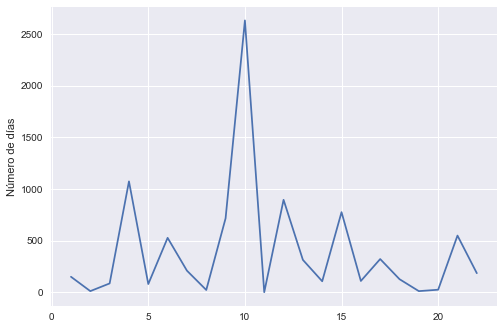

In [57]:
# Con la lista anterior podemos graficar los días entre sismos usando una escala arbitraria en el eje X. 
# Vemos que no hay una regularidad en el tiempo que pasa entre cada sismo.  

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],dias)
plt.ylabel("Número de días")
plt.show()

In [58]:
# Convertimos la lista de días a un dataframe para calcular la media y la desviación estandar. 

dias_df=pd.DataFrame(dias)

In [59]:
# Calculamos la media

#https://blog.adrianistan.eu/2017/11/04/estadistica-python-media-mediana-varianza-percentiles-parte-iii/
media = dias_df.mean()

In [60]:
media

0    405.690236
dtype: float64

In [61]:
# Calculamos la  desciación estandar

std = dias_df.std(ddof=0)
#var = df["nota"].var(ddof=0)
std

0    575.895125
dtype: float64

### 3. Verifiquen, con el coeficiente de correlación, si hay dependencia entre magnitud y profundidad de los terremotos 

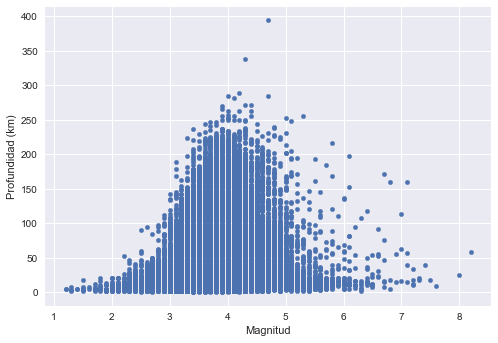

In [62]:
# Graficamos la magnitud contra la profundidad

#https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/
disp= sismos.plot(kind='scatter', x="Magnitud", y="Profundidad (km)")
plt.show()

In [63]:
# Obtenemos el índice de correlación.

# El resultado indica que exite una correlación positiva. 

# https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/
# https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson
np.corrcoef(sismos["Magnitud"], sismos["Profundidad (km)"])

array([[ 1.        ,  0.12929343],
       [ 0.12929343,  1.        ]])

### 4. Colóquenlos en el mapa, de manera proporcional a la energía que liberaron (un poco de ayuda después)

La tarea de graficar esto no es tan sencilla, por fortuna seguimos utilizando `folium`.

Para el 4to punto, necesito que hagan algo muy específico: La escala de Richter es una escala logaritmica de base 10, donde la magnitud $M_L$ se determina como.

$M_L = log_{10}(\frac{A}{A(\delta)})$

siendo $A$ la amplitud registrada por un sismografo, y $A(\delta)$ una función de amplitud de referencia con una compensación basada en la distanca del sismógrafo al epicentro del sismo $\delta$. La relación de energía con la amplitud de una onda sismicaa es $E \propto A^{3/2}$. Esto quiere decir que un sismo de 5 grados libera $\approx 31.6$ veces menos energía que un sismo de 6 grados. Para graficar la localización y cantidad de energía liberada por estos sismos, hagan uso de la función "CircleMarker" de folium, y hagan una selección **adecuada** (en verdad enfatizo eso) del radio de los marcadores, sabiendo que lo que se busca es que los círculos representen la cantidad de energía liberada.

Además les dejo una función que hace un gradiente lineal de color entre dos tripletes RGB (red green blue) entre dos escalas de sismos (por defecto, 6.8 un extremo y 8.2 el otro). La pueden utilizar para darle color a los círculos también (pueden modificar la función para usar los colores que quieran)

In [64]:
# Obtenemos del dataframe 'sismos' uno nuevo con solo los datos donde los sismos fueron >=6.8

sismos_mayores = sismos[sismos["Magnitud"] >= 6.8]
sismos_mayores.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,anuales,Estado
524,7.2,16.2500,-98.0300,12,2018-02-16 17:39:38,2018,Oaxaca
16699,7.1,18.4000,-98.7200,57,2017-09-19 13:14:40,2017,Puebla
19741,8.2,14.8500,-94.1100,58,2017-09-07 23:49:18,2017,NaN
23934,7.0,14.7700,-92.0800,113,2017-06-14 02:29:03,2017,NaN
60970,6.9,14.6502,-92.5572,56,2014-07-07 06:23:59,2014,NaN


\begin{align} 
M_L = log\left(\frac{A}{A(\delta)}\right)\\
e^{M_L}=\frac{A}{A(\delta)}\\
A(\delta)e^{M_L}=A\\
E \propto A^{3/2}\\
e^{3/2M_L} = E
\end{align}

$e^{3/2*6.8} = 26903.2$ Calculamos los radios con:


\begin{align} 
radio = \frac{e^{3/2M_L}*m}{e^{3/2*6.8}}
\end{align}

Donde $m$ es un factor de escala. En este caso $m$ es el radio que le asignamos al evaluar la magnitud menor(6.8) en la formula de la energía liberada.

In [103]:
sm = sismos_mayores.reset_index()

In [114]:
np.exp(6.8*3/2)

26903.18607429754

In [117]:
radios = []
for i in range(len(sismos_mayores["Magnitud"])):
    rad = np.exp(sm["Magnitud"][i]*3/2)*6/(np.exp(6.8*3/2))
    radios.append(rad)

In [118]:
radios

[10.932712802343069,
 9.4098731129410069,
 48.997019475405885,
 8.0991528454560235,
 6.9710054563697135,
 10.932712802343069,
 12.702000099676049,
 6.0,
 17.145906708378995,
 10.932712802343069,
 19.920701536419269,
 6.0,
 8.0991528454560235,
 14.757618666941729,
 8.0991528454560235,
 6.9710054563697135,
 9.4098731129410069,
 9.4098731129410069,
 9.4098731129410069,
 36.297884786477702,
 12.702000099676049,
 6.0,
 10.932712802343069]

In [120]:
#Agregamos los radios a los datos del dafaframe 'sismos-mayores'

sismos_mayores["radios"] = pd.Series(radios).values 

/home/solaris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
sismos_mayores.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,anuales,Estado,radios
524,7.2,16.2500,-98.0300,12,2018-02-16 17:39:38,2018,Oaxaca,10.932713
16699,7.1,18.4000,-98.7200,57,2017-09-19 13:14:40,2017,Puebla,9.409873
19741,8.2,14.8500,-94.1100,58,2017-09-07 23:49:18,2017,NaN,48.997019
23934,7.0,14.7700,-92.0800,113,2017-06-14 02:29:03,2017,NaN,8.099153
60970,6.9,14.6502,-92.5572,56,2014-07-07 06:23:59,2014,NaN,6.971005
62645,7.2,17.0110,-101.4600,18,2014-04-18 09:27:21,2014,NaN,10.932713
70545,7.3,14.0272,-92.3155,17,2012-11-07 10:35:50,2012,NaN,12.702000
73415,6.8,28.8278,-113.1640,5,2012-04-12 02:15:46,2012,NaN,6.000000
73928,7.5,16.2640,-98.4570,18,2012-03-20 12:02:48,2012,NaN,17.145907
81966,7.2,32.4700,-115.3700,10,2010-04-04 17:40:42,2010,NaN,10.932713


In [122]:
# https://stackoverflow.com/questions/44794881/keyerror-count-occurred-at-index-0
# https://stackoverflow.com/questions/42756934/how-to-plot-lat-and-long-from-pandas-dataframe-on-folium-map-group-by-some-label

map_osm = folium.Map(location=[23.0,-102.0], zoom_start=5)

sismos_mayores.apply(lambda row:folium.CircleMarker(location=[row["Latitud"], row["Longitud"]], 
                                              radius =row["radios"],
                                              fill_color=intensityColor(row["Magnitud"]),
                                              fill = True)
                                             .add_to(map_osm), axis=1)

map_osm

## Ejercicio 4: Buscando patrones antes de un evento de gran escala (medio difícil)

En la siguiente parte, vamos a ver si, de manera sencilla, podemos encontrar patrones de comportamiento sísmico antes de un evento de gran escala (Terremoto de magnitud >= 7.0). Como primer ejercicio, encuentre cuántos sismos hay con dicha magnitud:

1. Definan un intervalo de tiempo a analizar antes de un sismo de gran magnitud, por ejemplo, 24 horas ó 5 días (justifiquen su escala de tiempo)
2. Para todos los sismos de magnitud igual o mayor a 7.0, grafiquen el comportamiento de la región (en un ángulo sólido prudente) en el periodo de tiempo que escogieron antes del sismo. Busquen si hay algún patrón evidente y concluyan.

Como tip, la diferencia de dos estampas de tiempo genera un pd.Timedelta. La siguiente función puede tomar un arreglo ( o una serie) de `pd.Timedelta` para convertirlo en horas:

In [75]:
toHours = np.vectorize(lambda x : x.total_seconds()/3600)

In [76]:
type(toHours)

numpy.lib.function_base.vectorize

Les va a ser mucho más fácil si trabajan en horas para este ejercicio.

Como intervalo de tiempo tomaremos el valor de la media: 405.690236 días

In [77]:
tiempo = toHours(tiempo_entre_terremotos)

In [78]:
#Sismos con magnitud >= 7.0
sismos_siete=sismos["Magnitud"]>=7.0
sismos_siete.value_counts()

False    105928
True         18
Name: Magnitud, dtype: int64

In [79]:
datos = pd.DataFrame(tiempo).rename(columns={0: 'horas'})
df2 = pd.DataFrame([[0]]).rename(columns={0: 'horas'})
datos=datos.append(df2, ignore_index=True)
datos.head();

In [80]:
datos1 = pd.DataFrame(terremotos).rename(columns={0: 'magnitud'})
datos1.head();

In [81]:
datos2=pd.merge(datos, datos1, left_index=True, right_index=True)
datos2.head()

,horas,mag
0,3604.416111,7.2
1,277.422778,7.1
2,2061.337500,8.2
3,25748.084444,7.0
4,1916.943889,6.9


In [87]:
med=405.690236*24

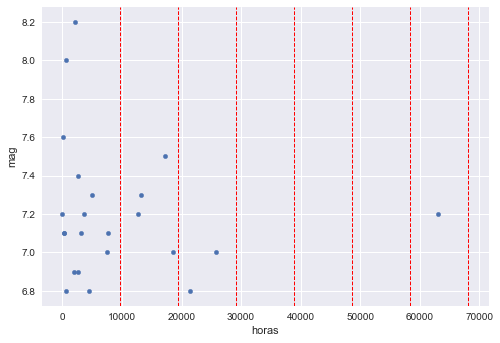

In [90]:
#https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
#http://people.duke.edu/~ccc14/pcfb/analysis.html
#https://devhub.io/repos/christopherjenness-bootstrap

disp2= datos2.plot(kind='scatter', x='horas', y='magnitud')
plt.axvline(med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(2*med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(3*med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(4*med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(5*med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(6*med, color='r', linestyle='dashed', linewidth=1)
plt.axvline(7*med, color='r', linestyle='dashed', linewidth=1)
plt.show()

# Ejercicio 5: Qué más nos hace falta decir? (extra)

En esta última parte, pueden hacer **lo que quieran** con los datos. Agruparlos, clasificarlos, tienen libertad de sacar conclusiones de los datos que les he dado, pueden hacer algo con los mapas o hacer histogramas, queda en ustedes :)